# Distributed Analysis

The Arnheim Framework bridges djangos ORM with cluster based analysis. A Representation inherits from the LarvikArray which in turn is a Proxy for xArray. All of the meta data is stored in this datafile so it is easily browsable.

In [1]:
import django
django.setup()

2020-02-13 15:08:27,719 [mandal.settings] INFO     Debugging build
2020-02-13 15:08:27,720 [mandal.settings] INFO     Hosting on ['*']


In [2]:
from dask.distributed import Client, progress
c = Client()
c

/opt/conda/lib/python3.7/site-packages/distributed/client.py:1074: VersionMismatchWarning: Mismatched versions found

msgpack
+------------------------+---------+
|                        | version |
+------------------------+---------+
| client                 | 0.6.1   |
| scheduler              | 0.6.2   |
| tcp://172.18.0.3:39929 | 0.6.2   |
+------------------------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Client Scheduler: tcp://daskscheduler:8786 Dashboard: http://daskscheduler:8787/status,Cluster Workers: 1 Cores: 4 Memory: 4.65 GB


## Import

Representation is bergens binder of ImageStack where general x and y dimensions have not been altered to the original ImageStack, so 2D Rois are all perfectly aligned.

In [3]:
from bioconverter.models import Representation
from filters.logic.filters import  Prewitt, Mapping
from filters.logic.projections import MaxISP
import larvik.extenders

2020-02-13 15:08:35,430 [larvik.extenders] INFO     Making DataArrays Look Beautiful
2020-02-13 15:08:35,431 [larvik.extenders] INFO     Extending DataArray


In [4]:
reps = Representation.distributed.filter(type="initial", sample__bioseries__bioimage__locker__name__startswith="Test")
reps

<RepresentationQuerySet [<Representation: Initial Stack>, <Representation: Initial Stack>, <Representation: Initial Stack>]>

## Further Filtration on the Cluster

Further Analysis is then done on the Cluster (the LarvikBag call is a Proxy to Dask Bag, with _getarr_ matching, put provides more methods like parsing and setting storage

In [14]:
filtered = reps.asBag().filter(lambda x: "z" in x.dims)

In [15]:
parsed = filtered.map(lambda x: x.chunk({"x": x.x.size, "y": x.y.size, "z": 1})).parse(Prewitt,MaxISP)

In [16]:
test = parsed.compute()

In [ ]:
test[2].compute().viewer.show()

In [10]:
test

<xarray.DataArray 'sqrt-3a297f44a28095554d7aa82d29924a7c' (x: 512, y: 512, c: 2, t: 1)>
array([[[[0.        ],
         [0.        ]],

        [[0.04850713],
         [0.05998847]],

        [[0.02352941],
         [0.05882353]],

        ...,

        [[0.02352941],
         [0.04705883]],

        [[0.03720327],
         [0.05882353]],

        [[0.06335488],
         [0.05261337]]],


       [[[0.        ],
         [0.        ]],

        [[0.03720327],
         [0.04241825]],

        [[0.02630668],
         [0.05261337]],

        ...,

        [[0.01663781],
         [0.03327562]],

        [[0.01663781],
         [0.01663781]],

        [[0.04241825],
         [0.01176471]]],


       [[[0.03327562],
         [0.01663781]],

        [[0.02352941],
         [0.01176471]],

        [[0.01176471],
         [0.01176471]],

        ...,

        [[0.01176471],
         [0.02352941]],

        [[0.02630668],
         [0.05261337]],

        [[0.01663781],
         [0.03327562]]],


       ...,


       [[[0.10120383],
         [0.13153342]],

        [[0.08564836],
         [0.07533088]],

        [[0.06335488],
         [0.04850713]],

        ...,

        [[0.23203628],
         [0.17489493]],

        [[0.4472136 ],
         [0.33275613]],

        [[0.48507126],
         [0.32132942]]],


       [[[0.07058824],
         [0.03529412]],

        [[0.04241825],
         [0.04241825]],

        [[0.05998847],
         [0.05261337]],

        ...,

        [[0.36941927],
         [0.27464984]],

        [[0.39809235],
         [0.36318469]],

        [[0.38983629],
         [0.31960184]]],


       [[[0.07058824],
         [0.03529412]],

        [[0.02630668],
         [0.05998847]],

        [[0.03720327],
         [0.04241825]],

        ...,

        [[0.22197603],
         [0.13770236]],

        [[0.26306682],
         [0.25012109]],

        [[0.28455027],
         [0.2232196 ]]]])
Coordinates:
  * c         (c) int64 0 1
    channels  (c) [('Index', '<i8'), ('Name', '<U250'), ('EmissionWavelength', '<f8'), ('ExcitationWavelength', '<f8'), ('IlluminationType', '<U250'), ('AcquisitionMode', '<U250'), ('Color', '<U250'), ('SamplesPerPixel', '<i8')] (0, 'Prewitt of Ch1', nan, nan, 'None', 'None', '16711935', 1) (1, 'Prewitt of Ch2', nan, nan, 'None', 'None', '-16776961', 1)
    physt     (t) float64 0.0
    physx     (x) float64 0.0 0.1384 0.2768 0.4151 ... 70.3 70.43 70.57 70.71
    physy     (y) float64 0.0 0.1384 0.2768 0.4151 ... 70.3 70.43 70.57 70.71
  * t         (t) int64 0
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511

## Evaluation
As long as no computation is called the array has not yet been altered. We can call this for each array individual or for the whole stack

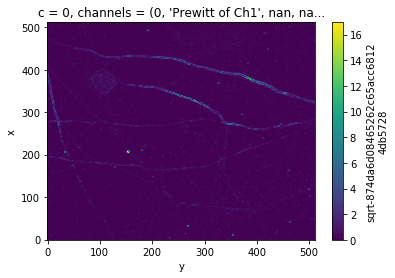

In [28]:
%matplotlib inline
parsed.sel(c=0,t=0).plot.imshow()